<a href="https://colab.research.google.com/github/pkuSapphire/Hakutaku/blob/main/creditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# By Bosen Li (bl3097), Wenyu Luo (wl2905), Edward Zhang (yz4756)

import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

data = pd.read_pickle('In-Class Exercise #2.pickle')
data.head()
variables = ['nonIE', 'assets', 'acl_to_loans']
auc = 100 - roc_auc_score(data['default'], data['nonII'])*100
print(f"AUC for nonII: {auc:0.2f}")
auc_scores = {}
for var in variables:
    auc = roc_auc_score(data['default'], data[var])*100
    auc_scores[var] = auc
    print(f"AUC for {var}: {auc:0.2f}")

missing_values = data['acl_to_loans'].isna().sum()
total_values = len(data['acl_to_loans'])
populated_percentage = ((total_values - missing_values) / total_values) * 100
print(f"acl_to_loans is {populated_percentage:.2f}% populated.")

# AUC for nonII: 72.62
# AUC for nonIE: 57.75
# AUC for assets: 49.71
# AUC for acl_to_loans: 85.62

# acl_to_loans seems to be the strongest predictors based on the AUCs.

# The variables are good populated because acl_to_loans is 100.00% populated.

# acl_to_loans stands for "allowance for credit losses on loans", so it is
# obvious that if this ratio is higher, then the bank have higher resisliance
# on default of loans. Thus, the bank have better/healthier financial status,
# indicating that the bank have lower default rate. So it is a good driver.

# Probably it is linear because I conducted a regression for acl**2 and
# acl**3 but it does not seems good.

AUC for nonII: 72.62
AUC for nonIE: 57.75
AUC for assets: 49.71
AUC for acl_to_loans: 85.62
acl_to_loans is 100.00% populated.


In [ ]:
# By
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

fininfo = pd.read_pickle('In-Class Exercise #2.pickle')
# print(fininfo.shape)
# print(fininfo.head())

Y = fininfo['default']
X = fininfo[['nonII', 'nonIE', 'assets', 'acl_to_loans']]
X = sm.add_constant(X)


logit_model = sm.Logit(Y, X)
result = logit_model.fit()
print(result.summary())

predicted_PD = result.predict(X)
fininfo['predicted_PD'] = predicted_PD
fininfo.to_pickle('logit_model_predictions.pickle')

print('\n')
print(fininfo[['IDRSSD', 'predicted_PD']])

print("-1 times PD AUC in percent")
print(f'{100 * roc_auc_score(Y, -1 * predicted_PD):2.1f}')
print("PD AUC in percent")
print(f'{100 * roc_auc_score(Y, predicted_PD):2.1f}')

# Optimization terminated successfully.
#          Current function value: 0.034636
#          Iterations 10
#                            Logit Regression Results
# ==============================================================================
# Dep. Variable:                default   No. Observations:                17585
# Model:                          Logit   Df Residuals:                    17580
# Method:                           MLE   Df Model:                            4
# Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.1576
# Time:                        23:57:14   Log-Likelihood:                -609.07
# converged:                       True   LL-Null:                       -723.04
# Covariance Type:            nonrobust   LLR p-value:                 3.654e-48
# ================================================================================
#                    coef    std err          z      P>|z|      [0.025      0.975]
# --------------------------------------------------------------------------------
# const           -5.8212      0.211    -27.627      0.000      -6.234      -5.408
# nonII         -114.6840     12.525     -9.156      0.000    -139.233     -90.135
# nonIE           17.9565      7.041      2.550      0.011       4.157      31.756
# assets       -1.279e-11   6.67e-10     -0.019      0.985   -1.32e-09    1.29e-09
# acl_to_loans    56.8652      4.290     13.254      0.000      48.456      65.274
# ================================================================================


#         IDRSSD  predicted_PD
# 0       991340      0.002019
# 1       282208      0.001935
# 2         5210      0.004346
# 3       774730      0.006982
# 4      2079493      0.004048
# ...        ...           ...
# 17580   384018      0.004849
# 17581  1161029      0.004219
# 17582   809771      0.004018
# 17583  3145797      0.002250
# 17584   276579      0.003708

# [17585 rows x 2 columns]
# -1 times PD AUC in percent
# 12.2
# PD AUC in percent
# 87.8


Optimization terminated successfully.
         Current function value: 0.034636
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                17585
Model:                          Logit   Df Residuals:                    17580
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.1576
Time:                        23:57:14   Log-Likelihood:                -609.07
converged:                       True   LL-Null:                       -723.04
Covariance Type:            nonrobust   LLR p-value:                 3.654e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.8212      0.211    -27.627      0.000      -6.234      -5.408
nonII         -114.684

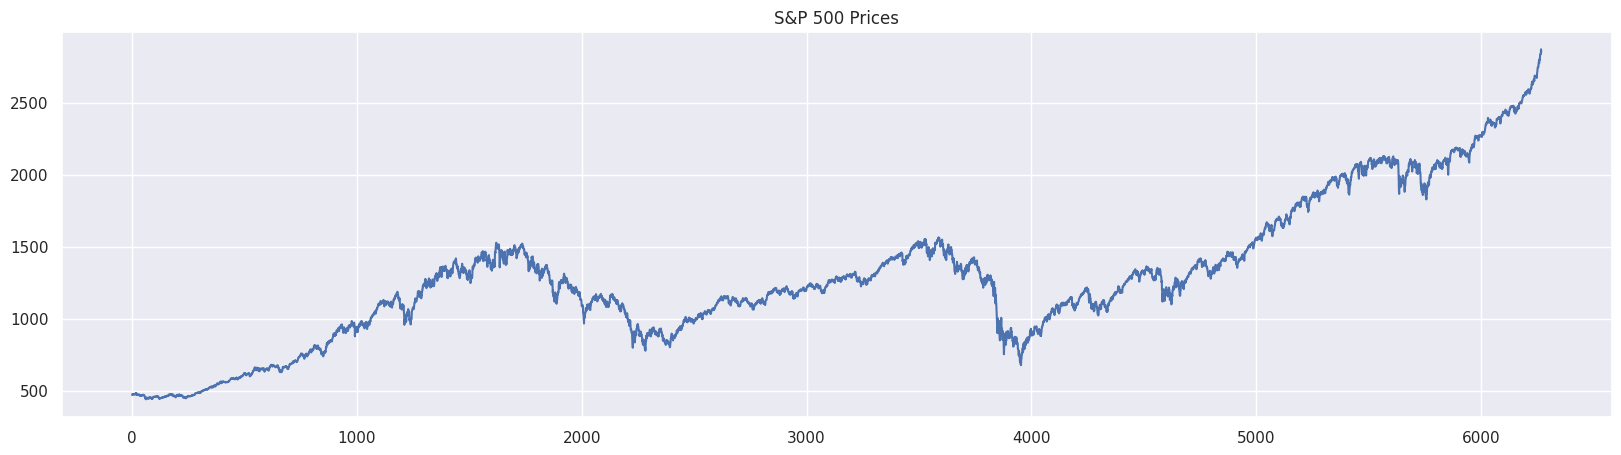

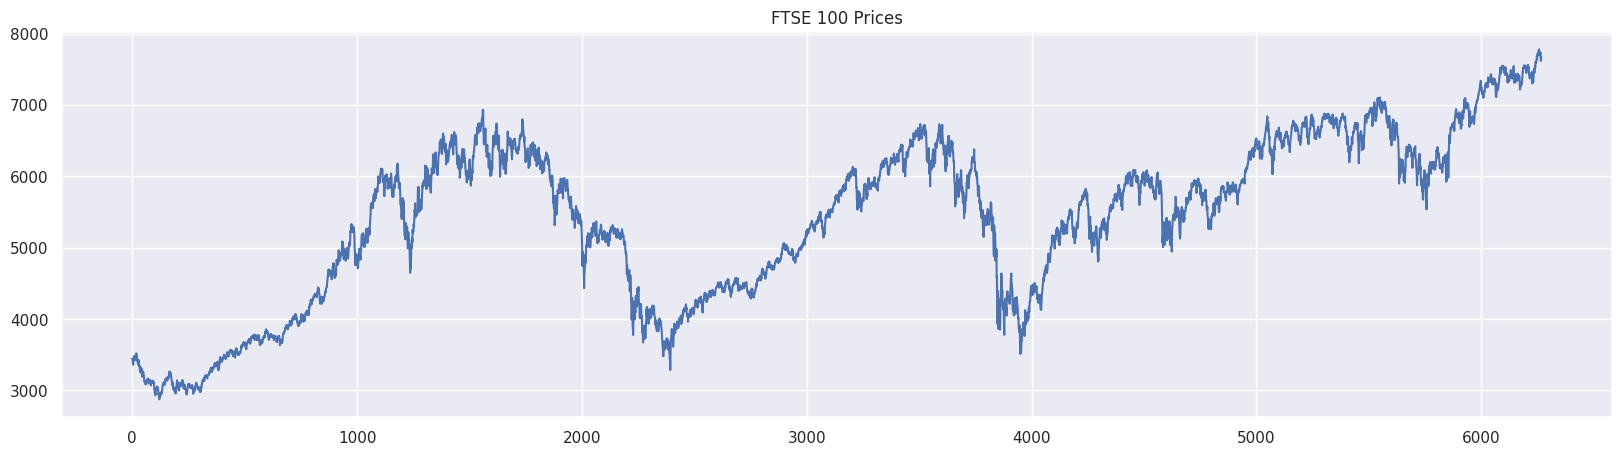

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.head(10)
df_comp.spx.plot(figsize=(20,5),title='S&P 500 Prices')
plt.show()
df_comp.ftse.plot(figsize=(20,5), title='FTSE 100 Prices')
plt.show()

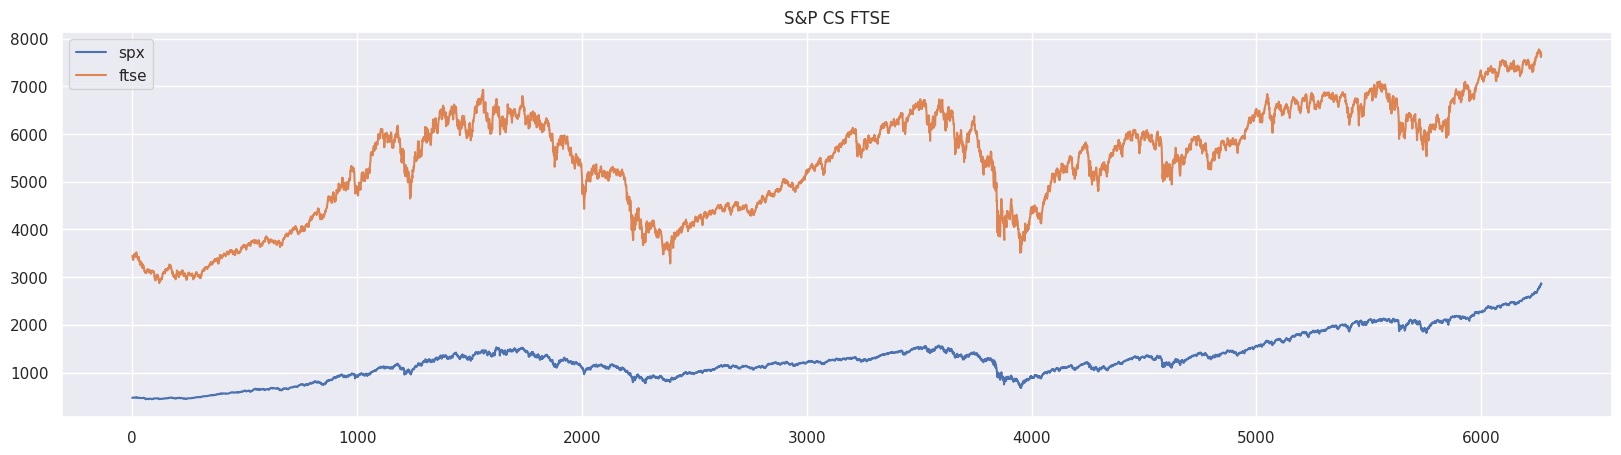

In [ ]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.title('S&P CS FTSE')
plt.legend()
plt.show()

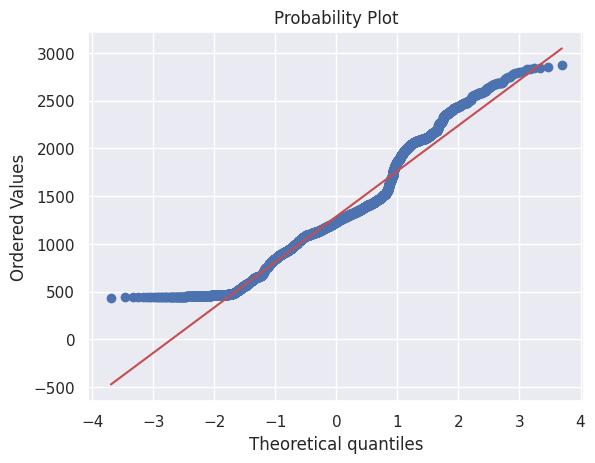

In [ ]:
import scipy.stats
import pylab

# QQ plot check on Normal Distribution

scipy.stats.probplot(df_comp.spx, plot=pylab)
pylab.show()

In [ ]:
# from text to date

# df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
# df_comp.set_index("date",inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df_comp = df_comp.asfreq("B")
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
# check of missing values

df_comp.isna().sum()
df_comp.spx = df_comp.spx.fillna(method="ffill")
df_comp.isna().sum()

<ipython-input-33-faab7ee0fc4b>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.spx = df_comp.spx.fillna(method="ffill")


,0
spx,0
dax,8
ftse,8
nikkei,8


In [ ]:
df_comp.ftse = df_comp.ftse.fillna(method="ffill")
df_comp.isna().sum()
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())
df_comp.isna().sum()

<ipython-input-38-787f671df925>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.ftse = df_comp.ftse.fillna(method="ffill")


,0
spx,0
dax,0
ftse,0
nikkei,8


In [ ]:
# simpify the dataset

df_comp['market_value'] = df_comp.spx
df_comp.describe()
del df_comp['dax'],df_comp['ftse'],df_comp['nikkei'],df_comp['spx']
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [ ]:
# training dataset and testing dataset

# Spiltting Data into two Dateset

size = int(len(df_comp)*0.8)

In [ ]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [ ]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [ ]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [ ]:
# white Noise

#   1. Constant mean
#   2. Constant variance
#   3. No autocorrelation in any period

wn = np.random.normal(loc = df.market_value.mean(),scale = df.market_value.std(),size = len(df))
df['wn'] = wn

<ipython-input-56-2e940c0f4bcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


,market_value,wn
date,,
1994-01-07,469.900000,829.811330
1994-01-10,475.270000,1412.917745
1994-01-11,474.130000,937.156259
1994-01-12,474.170000,1147.420196
1994-01-13,472.470000,959.965342
...,...,...
2013-04-01,1562.173837,1079.952023
2013-04-02,1570.252238,1221.528961
2013-04-03,1553.686978,1282.278959


In [ ]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1090.461858
std,292.559287,290.248061
min,438.920000,161.693032
25%,914.620000,898.347866
50%,1144.650000,1086.101236
75%,1316.280729,1285.248894
max,1570.252238,2021.946680


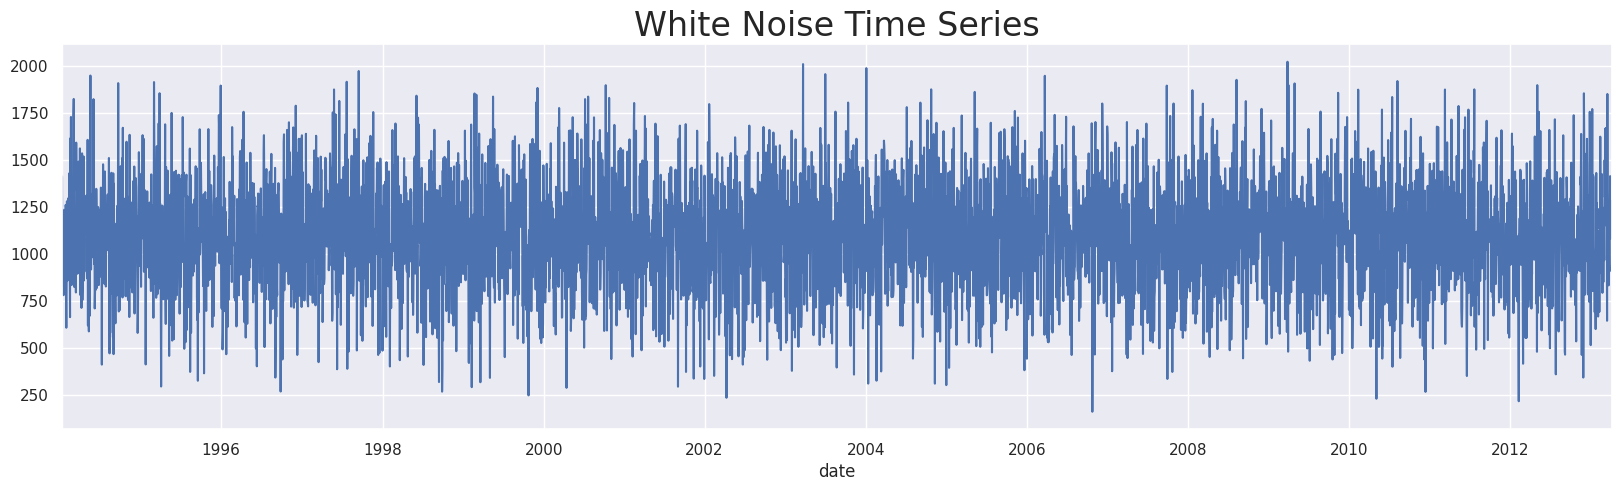

In [ ]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time Series", size = 24)
plt.show()

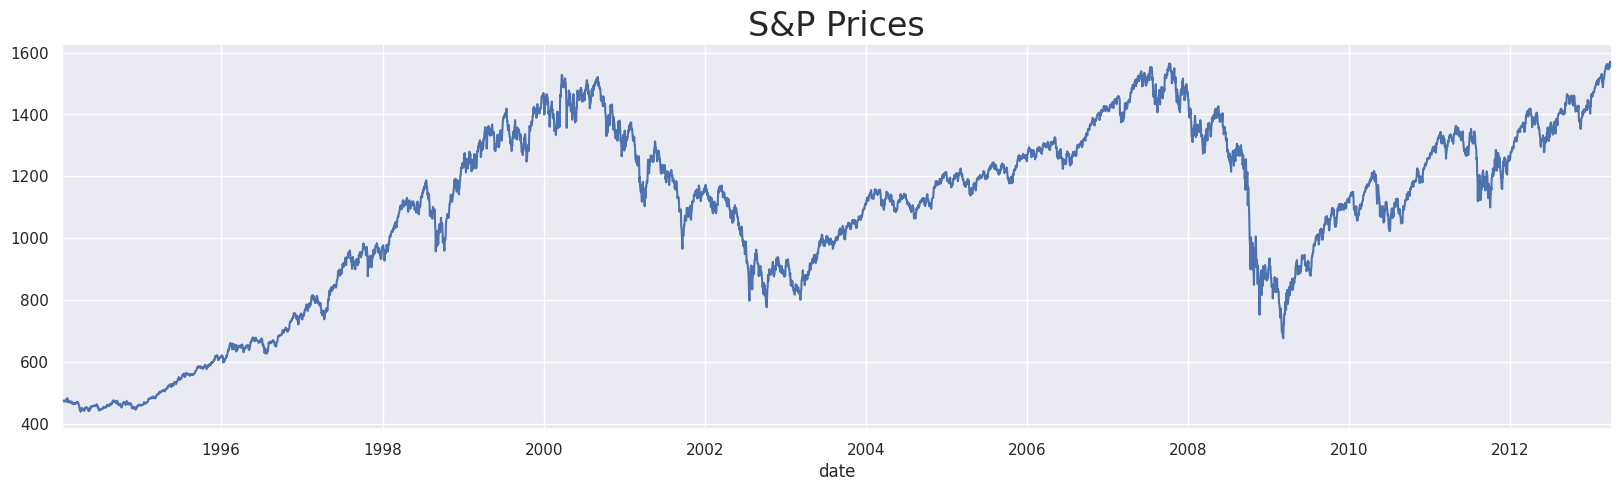

In [ ]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices",size = 24)
plt.show()

In [ ]:
rw = pd.read_csv("RandWalk.csv")
rw.date= pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)
rw = rw.asfreq('B')
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [ ]:
df['rw']=rw.price
df.head()

<ipython-input-64-377475afefba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw']=rw.price


,market_value,wn,rw
date,,,
1994-01-07,469.90,829.811330,1122.139662
1994-01-10,475.27,1412.917745,1080.347860
1994-01-11,474.13,937.156259,1082.095245
1994-01-12,474.17,1147.420196,1083.639265
1994-01-13,472.47,959.965342,1067.146255


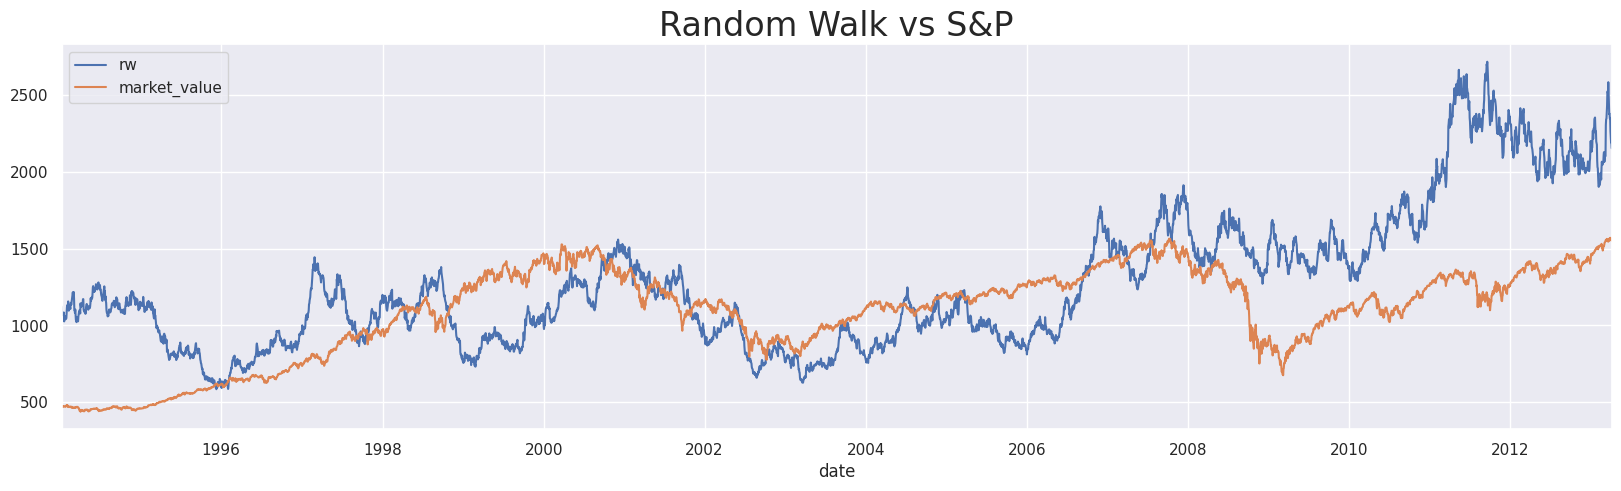

In [ ]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend()
plt.show()

In [ ]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
sts.adfuller(df.market_value)

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [ ]:
sts.adfuller(df.rw)

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

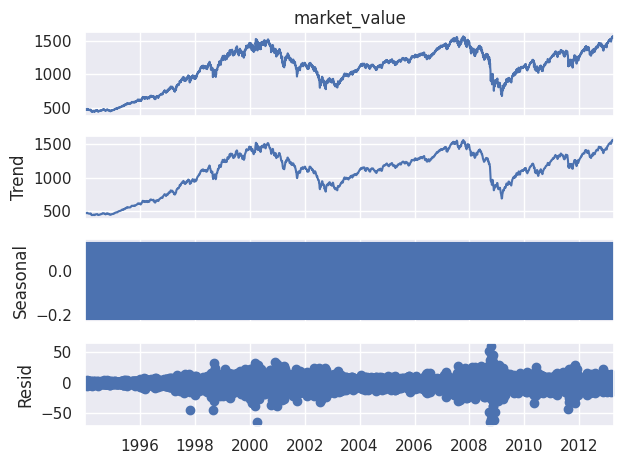

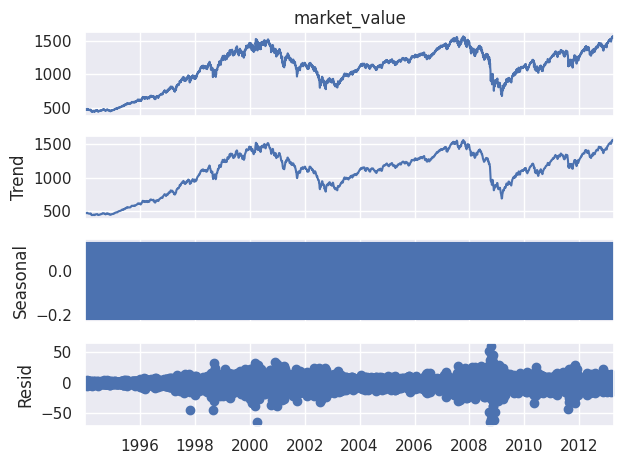

In [ ]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()

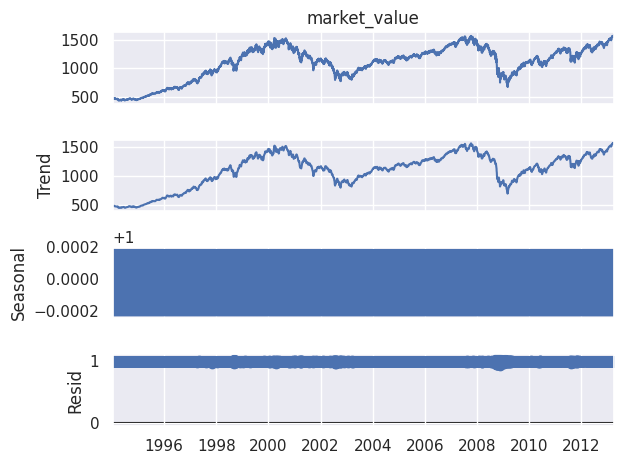

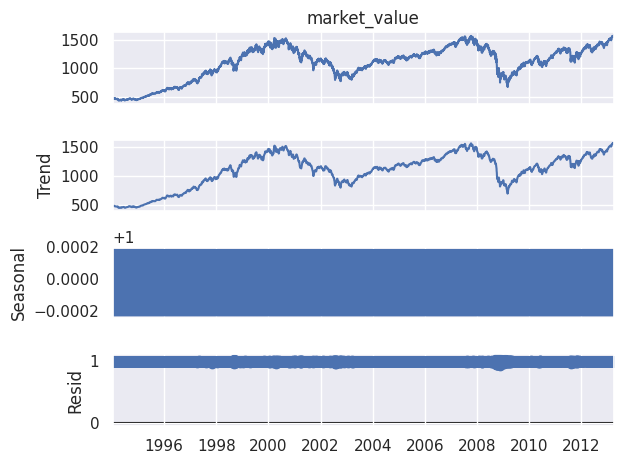

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multiplicative.plot()